In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
metric_path = './output2/eval'

df = pd.read_csv(os.path.join(metric_path, 'metric.csv'))
df

,iter,C_vec,C_cs,1-En,1-Em,eps,eps_p,sig_J,L1,L2
0,-1,1.000000,1.000000,1.000000,1.000000,1.000000,0.130138,0.013080,0.002065,0.002024
1,0,0.060634,0.268943,-1.421001,-6.143196,0.743979,0.096820,0.883638,0.000160,0.000357
2,1,-0.046547,-0.283600,-0.559940,-2.791768,0.128930,0.016779,0.757738,0.000444,0.000408
3,100,0.208082,0.505417,0.020215,-0.285618,0.034750,0.004522,0.776417,0.007800,0.000265
4,200,0.412154,0.648507,0.017317,-0.622371,0.189378,0.024645,0.724366,0.109216,0.024384
...,...,...,...,...,...,...,...,...,...,...
498,49600,0.993660,0.909454,0.776006,0.527431,0.965616,0.125663,0.066401,0.003089,0.002433
499,49700,0.993762,0.925673,0.775532,0.522425,0.962079,0.125203,0.065954,0.003196,0.002562
500,49800,0.993538,0.921283,0.771459,0.512363,0.965637,0.125666,0.066792,0.003142,0.002394
501,49900,0.993783,0.929982,0.774804,0.515479,0.964135,0.125471,0.065764,0.003044,0.002539


In [4]:
iter = np.array(df['iter'])
C_vec = np.array(df['C_vec'])
C_cs = np.array(df['C_cs'])
En_1 = np.array(df['1-En'])
Em_1 = np.array(df['1-Em'])
eps = np.array(df['eps'])
eps_p = np.array(df['eps_p'])
sig_J = np.array(df['sig_J'])
L1 = np.array(df['L1'])
L2 = np.array(df['L2'])

In [5]:
metrics = {r'$C_{\text{vec}}$':C_vec,
           r'$C_{\text{cs}}$':C_cs,
           r'$1-E_n$':En_1,
           r'$1-E_m$':Em_1,
           r'$\epsilon$':eps,
           r'$\epsilon_p$':eps_p,
           r'$\sigma_J$':sig_J,
           r'$L_1$':L1,
           r'$L_2$':L2,}

In [6]:
def plot_metric(metrics):
    for label, metric in metrics.items():
        fig, ax = plt.subplots(figsize=(8,4))
        ax.hlines(metric[0], xmin=iter[1], xmax=iter[-1], color='red', label='LL')
        ax.plot(iter[1:], metric[1:], color='blue', label='PINN')
        ax.set_ylabel(label, fontsize=12)
        ax.legend(loc='center right', fontsize=12)
        ax.set_xlabel('Iteration', fontsize=12)
        ax.tick_params(axis='both', which='major', labelsize=12)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        fig.show()

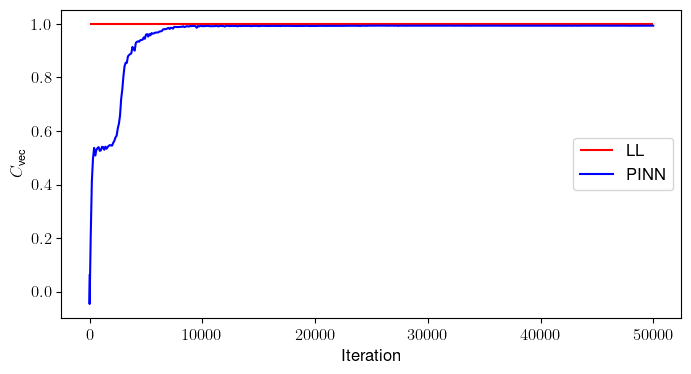

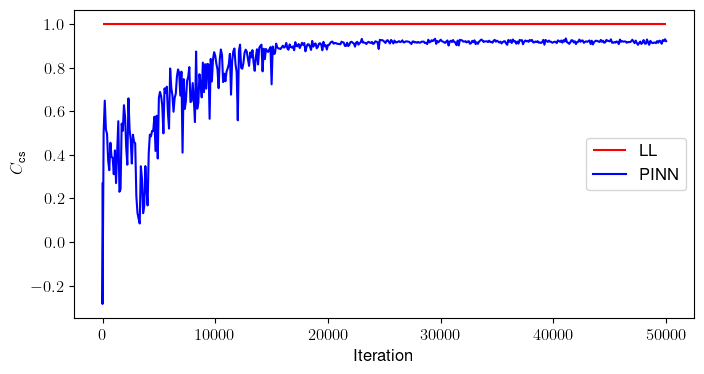

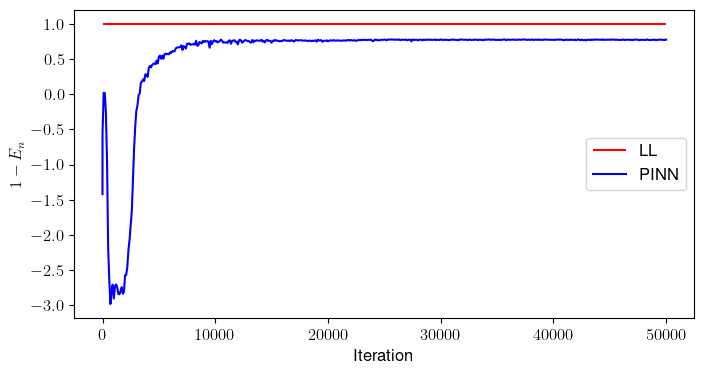

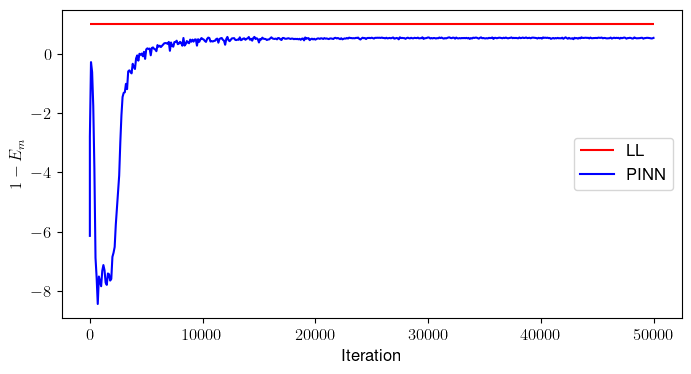

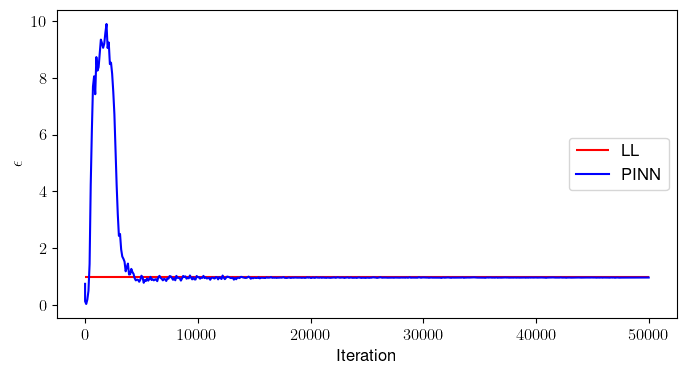

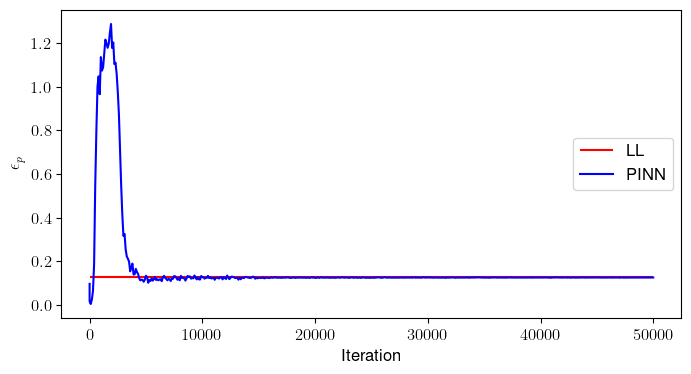

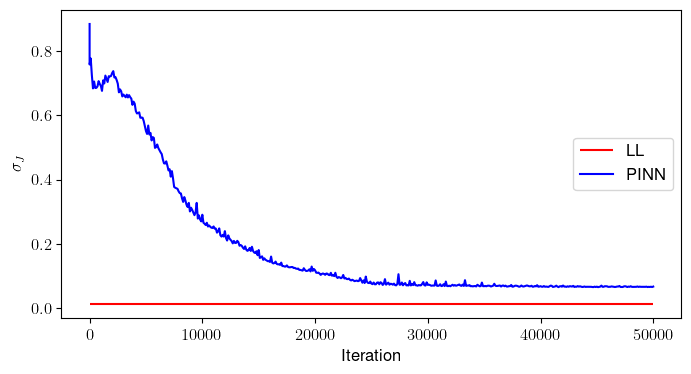

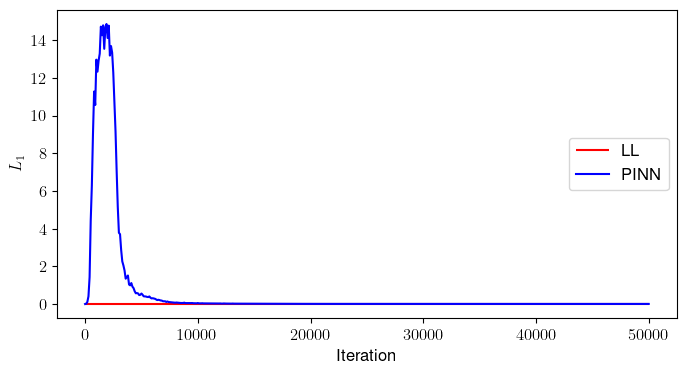

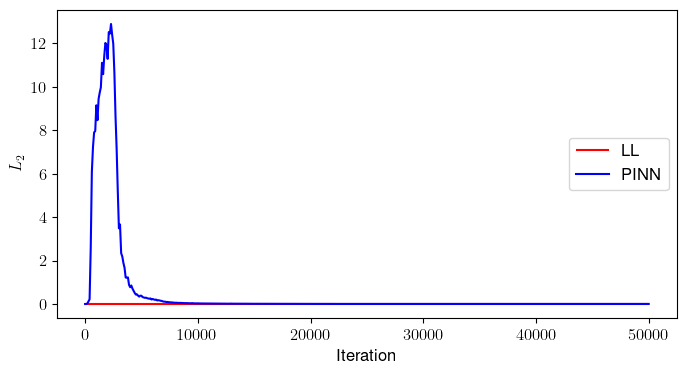

In [7]:
plot_metric(metrics)